## Dieses Notebook umfasst die Trainingsschritte der Phase 2 der LSTM-Modelle mit Word2Vec-Vektorisierung und dokumentiert die Ergebnisse.

## Codeabschnitt

In [1]:
# !pip install tensorflow
#!pip install transformers
#!pip install tf-keras
# !pip install imblearn

In [1]:
import sys
from pathlib import Path

# Zum übergeordneten Ordner 'src' wechseln
current_path = Path().resolve()
src_path = current_path.parents[4]  # Zwei Stufen nach oben

if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

src_path


WindowsPath('C:/Users/Nasiba/Documents/1 Master Data Science/Projektpraktikum/WebScience24')

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import  classification_report, confusion_matrix
pd.set_option('display.max_colwidth', None)

from vector_functions import vectorize_word2vec,  vectorize_word2vec_test_data
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping

#### Beladung der Daten

In [3]:

source_filepath_name = os.path.abspath(os.path.join(src_path, 'data/mixed_dataset/train_cleaned_rnn.csv'))

df_cleaned = pd.read_csv(source_filepath_name, encoding='utf-8', index_col=0)

source_filepath_name_test = os.path.abspath(os.path.join(src_path, 'data/mixed_dataset/test_cleaned_rnn.csv'))

df_cleaned_test = pd.read_csv(source_filepath_name_test, encoding='utf-8', index_col=0)


df_cleaned.head(1)


,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
140232,0,"Nicki's ""that's not good"" pout bought to you by Botox[™]. #MKR","nickis ""thats not good"" pout bought to you by botox trade mark mkr",0,['#mkr'],__trade_mark__


### Vektorisierung

#### Word2Vec

In [4]:
X_train_w2v, X_test_w2v, y_train_wv, y_test, w2v_model = vectorize_word2vec(df=df_cleaned, text_column ="tweet_cleaned", label_column="label")



c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\Training\Phase_2\vector_functions.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)


Shape nach Oversampling: (95868,)
(95868,)
(95868,)
Originaltext: nickis "thats not good" pout bought to you by botox trade mark  mkr
Tokenisierte Version: ['press', 'will', 'run', 'with', 'it']
❌ Fehlende Token (Beispiele): ['respectoureuphoria', 'precarious', 'appetites', 'pangolin', 'nanjing', '"performance"', 'blinks', 'denysee', 'escoed', 'onlygoodvibes', 'xterra', 'you~"', 'happy…when', 'mid-tantrum']
Gesamtanzahl fehlender Token: 14
Länge von X_train_w2v: 95868
Erste Sequenz: [[ 1.62590325e+00 -5.80360591e-01  2.18585357e-02  6.85505494e-02
   1.33074713e+00  2.21947357e-01  3.48031968e-02  9.47726220e-02
   2.80283988e-01  1.23429328e-01 -5.02190888e-02 -6.90089583e-01
   7.55362988e-01  6.08814240e-01  1.00959098e+00  4.05555099e-01
  -6.94617271e-01 -4.98088896e-01 -1.15266550e+00 -2.66785294e-01
   4.84352738e-01 -7.30122387e-01  7.33256519e-01  6.18947268e-01
   5.39789617e-01 -8.59052539e-01  2.10772410e-01 -4.82023843e-02
  -4.01343644e-01  2.97713190e-01  1.67331457e-01 

MemoryError: Unable to allocate 398. KiB for an array with shape (255, 200) and data type float64

In [ ]:
X_test_w2v_data, y_test_w2v_data, w2v_model = vectorize_word2vec_test_data(df=df_cleaned_test, text_column ="tweet_cleaned", label_column="label")

In [ ]:
samples_w2v, max_seq_len_w2v, vector_size_w2v = X_train_w2v.shape
num_classes_w2v = len(np.unique(y_train_wv))

print(samples_w2v)
print(max_seq_len_w2v)
print (vector_size_w2v)


(58313, 1, 200)
(32529, 1, 200)
(32529, 1, 200)


### Modell aufbauen 

Earlystop Aktivierung + Dropout Standard gelassen + epochen erhöhung + learning rate dynamisieren

In [17]:
# Vorhersagen auf Testdaten
predictions_21= model_21.predict(X_test_data_vectors_test_fast_word)
threshold = 0.35 # Oder teste 0.4 oder 0.6
predicted_classes_21 = (predictions_21 > threshold).astype(int)

1017/1017 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 F1-Score (Klasse 2): 0.1667
 Recall (Klasse 2): 0.1090
 Precision (Klasse 2): 0.3539
 Accuracy (gesamt): 0.7707
 MCC: 0.0927
Confusion Matrix:
 [[24323  1362]
 [ 6098   746]]


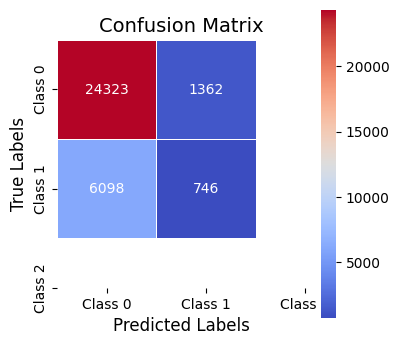

In [ ]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data_test_fast_word, predicted_classes_21, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data_test_fast_word, predicted_classes_21)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data_test_fast_word, predicted_classes_21)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f" F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f" Recall (Klasse 2): {recall_class_2:.4f}")
print(f" Precision (Klasse 2): {precision_class_2:.4f}")
print(f" Accuracy (gesamt): {accuracy:.4f}")
print(f" MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data_test_fast_word, predicted_classes_21)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Modell speichern

In [ ]:
save_path_model = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/models/model_21_fast.keras'))
# Erstelle das Verzeichnis, falls es nicht existiert
os.makedirs(os.path.dirname(save_path_model), exist_ok=True)
#save_path_model = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/model_17.h5')) 
model_21.save(save_path_model)
print(f"Modell wurde erfolgreich gespeichert unter: {save_path_model}")